In [9]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column', None)
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]

In [2]:
df = pd.read_csv(r'D:\Learn\Project\churn-in-telecoms-dataset\Telecom_dataset.csv')

In [3]:
def initial_analysis(df):
    print('Data_Shape:')
    print(df.shape)
    print('Data_Types:')
    print(df.dtypes)
    print('data_ifno:')
    print(df.info())
    print('Data_Sample:')
    print(df.head())
    print('Columns:')
    print(df.columns)
    print('Basic_Stat:')
    print(df.describe(include = 'all'))
    print('Null_Value:')
    print(df.isnull().sum())

In [4]:
initial_analysis(df)

Data_Shape:
(3333, 21)
Data_Types:
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
data_ifno:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state   

In [5]:
#from inital analysis and exp we found that some  of feature will not help us to bulid model so we will remove them
df1 = df.drop(['phone number', 'area code', 'state'], axis=1)

In [6]:
initial_analysis(df1)

Data_Shape:
(3333, 18)
Data_Types:
account length              int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
data_ifno:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voic

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B98B04BB48>,
      dtype=object)

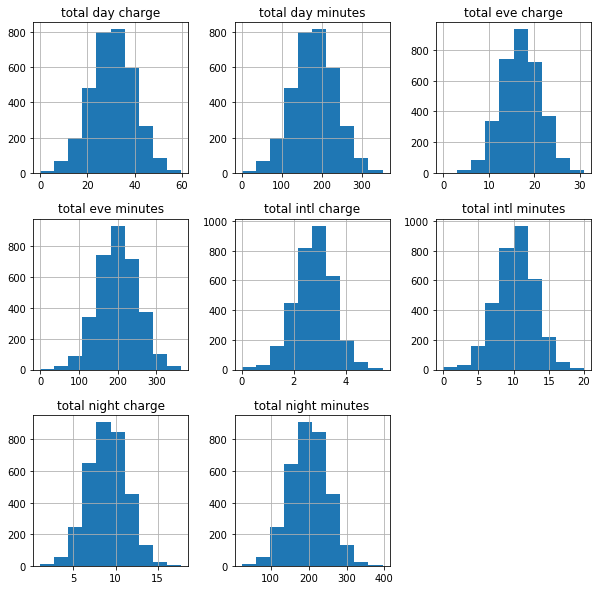

In [13]:
#lets inspect our feature
df[df.dtypes[df.dtypes == 'float64'].index.values].hist(figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B98B83C288>,
      dtype=object)

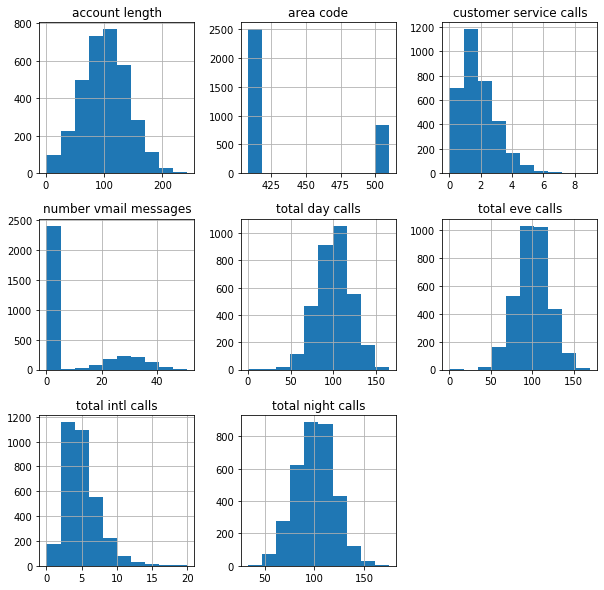

In [12]:
df[df.dtypes[df.dtypes == 'int64'].index.values].hist(figsize = (10,10))

In [16]:
df1.dtypes[df1.dtypes == "O"]

international plan    object
voice mail plan       object
dtype: object

In [19]:
df1['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
df1['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
# so we can easily convert them into numerical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2 = df1.copy()

df2['international plan'] = le.fit_transform(df2['international plan'])
df2['voice mail plan'] = le.fit_transform(df2['voice mail plan'])

In [25]:
initial_analysis(df2)

Data_Shape:
(3333, 18)
Data_Types:
account length              int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
data_ifno:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int32  
 2   voic

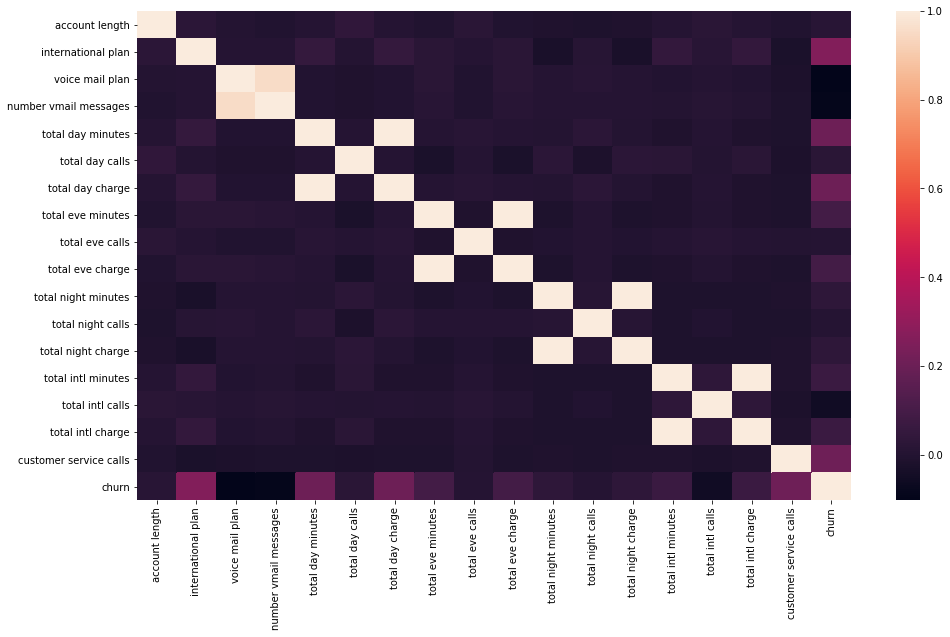

In [58]:
# let us see how features are related to each other
sns.heatmap(df2.corr())

# more brighter the square box more related to each other

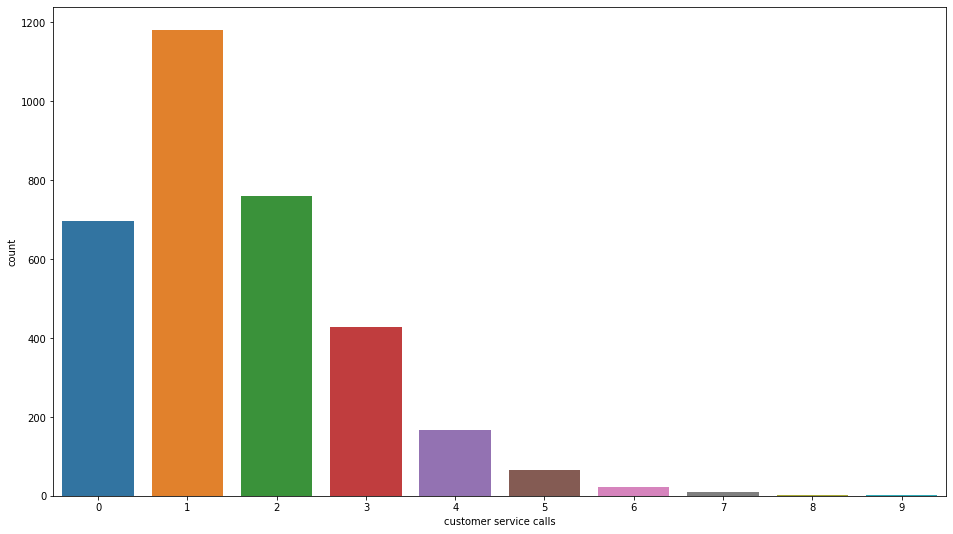

In [26]:
sns.countplot(x = 'customer service calls', data = df2)

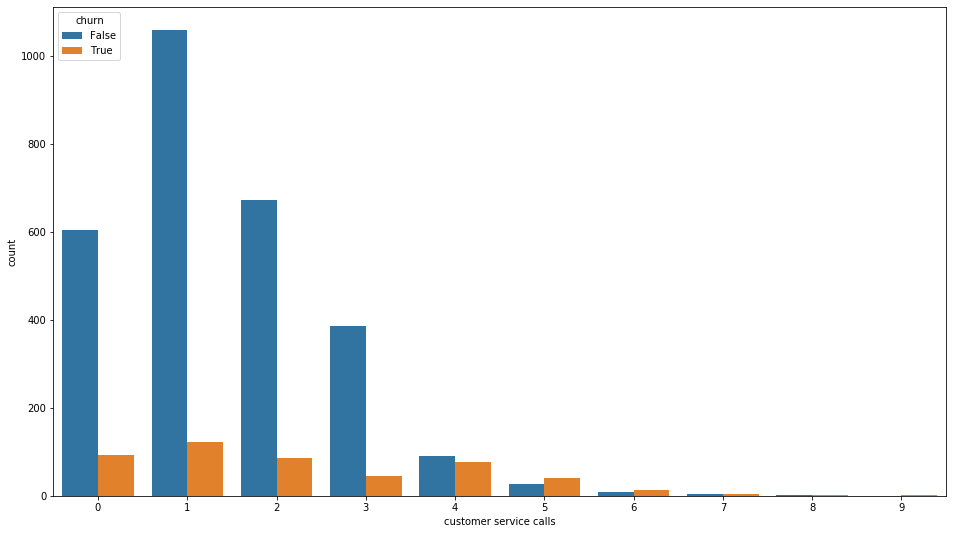

In [27]:
sns.countplot(x = 'customer service calls',hue = 'churn', data = df1)
#from this we can understand that how customer service calls related to churn

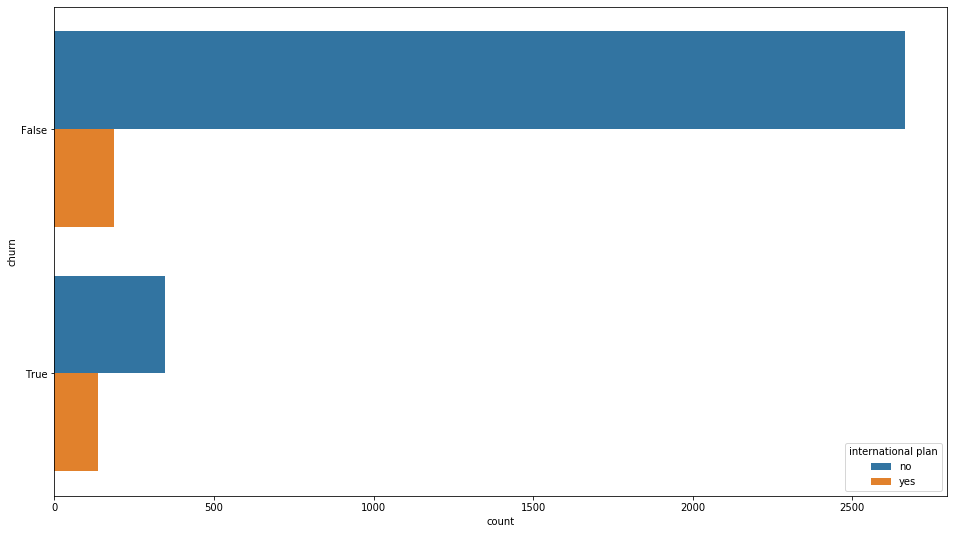

In [28]:
sns.countplot(y = 'churn', hue = 'international plan', data = df1)

In [29]:
#let us inspect our target variable
df2['churn'].unique()

array([False,  True])

In [30]:
df2['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [31]:
df2.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [32]:
#our data is ready to build model

X = df2.iloc[:, 0:-1]
y = df2.iloc[:, -1]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# for building model
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# for checking accuray
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.852746 (0.009357)
LDA: 0.851145 (0.011374)
KNN: 0.877953 (0.006785)
DTC: 0.913562 (0.009860)
NB: 0.861945 (0.016734)
SVM: 0.852741 (0.000913)
RFC: 0.947175 (0.005641)
MLP: 0.864345 (0.009258)
XGB: 0.948378 (0.001532)


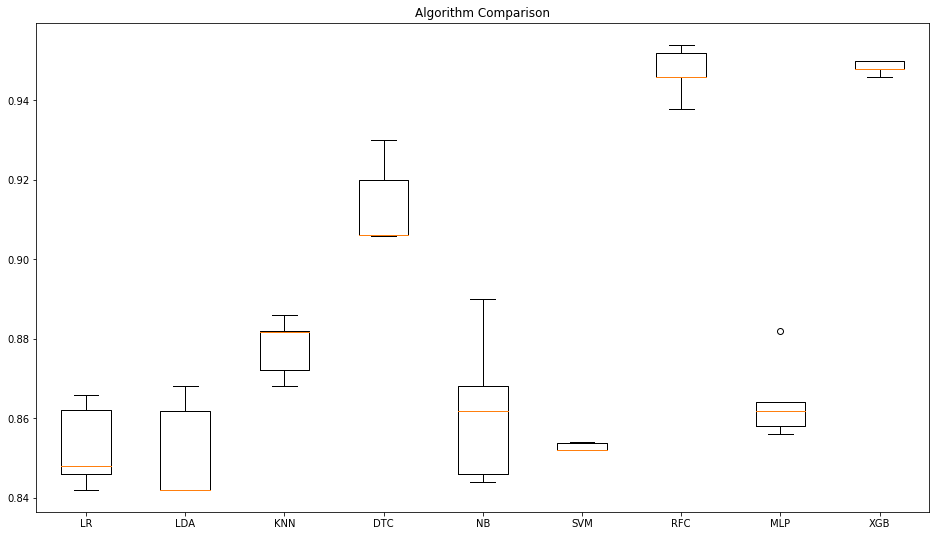

In [49]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [36]:
# from above testing we see that almost all model come up with more than 85% score 
# so further more analysis we will opt any one or two model and check performance

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
prediction = xgb.predict(X_test)

In [39]:
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

0.9520383693045563
[[705  14]
 [ 26  89]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       719
        True       0.86      0.77      0.82       115

    accuracy                           0.95       834
   macro avg       0.91      0.88      0.89       834
weighted avg       0.95      0.95      0.95       834



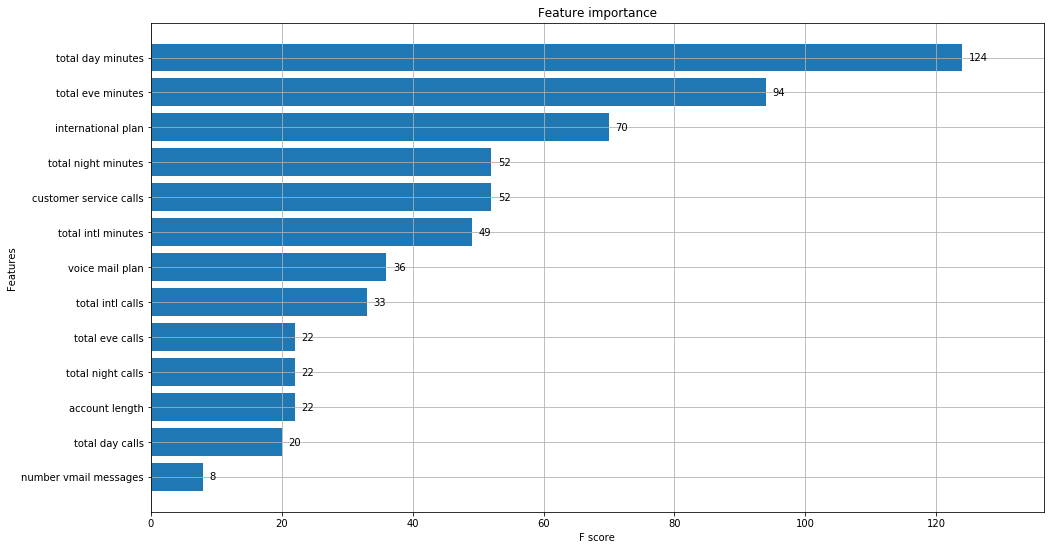

In [40]:
import xgboost
xgboost.plot_importance(xgb, max_num_features=50, height=0.8)

#from this we can see that which feature makes more effort to find result

In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
prediction1 = rfc.predict(X_test)

In [44]:
print(accuracy_score(y_test, prediction1))
print(confusion_matrix(y_test, prediction1))
print(classification_report(y_test, prediction1))

0.9568345323741008
[[707  12]
 [ 24  91]]
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       719
        True       0.88      0.79      0.83       115

    accuracy                           0.96       834
   macro avg       0.93      0.89      0.91       834
weighted avg       0.96      0.96      0.96       834



In [45]:
#let us do some predtion on trained model
X.loc[2]

account length            137.00
international plan          0.00
voice mail plan             0.00
number vmail messages       0.00
total day minutes         243.40
total day calls           114.00
total day charge           41.38
total eve minutes         121.20
total eve calls           110.00
total eve charge           10.30
total night minutes       162.60
total night calls         104.00
total night charge          7.32
total intl minutes         12.20
total intl calls            5.00
total intl charge           3.29
customer service calls      0.00
Name: 2, dtype: float64

In [47]:
print(rfc.predict([X.loc[2]]))

[False]


In [54]:
z = dict(X.loc[2])

In [56]:
z.values()

dict_values([137.0, 0.0, 0.0, 0.0, 243.4, 114.0, 41.38, 121.2, 110.0, 10.3, 162.6, 104.0, 7.32, 12.2, 5.0, 3.29, 0.0])

In [57]:
print(rfc.predict([[137.0, 0.0, 0.0, 0.0, 243.4, 114.0, 41.38, 121.2, 110.0, 10.3, 162.6, 104.0, 7.32, 12.2, 5.0, 3.29, 0.0]]))

[False]


In [59]:
print(rfc.predict([X.loc[202]]))

[False]


In [64]:
print(rfc.predict([X_train.iloc[202]]))

[False]
